# Optimisation in SQL

## What to expect:

### 1. Why do we Optimise in SQL?

### 2. Loading SQL and TMDB database

### 3. Tips on having effecient queries.

### 4. Common Table Expressions (CTEs).

### 5. Examples

---

## 1. Why do we Optimise in SQL

**SQL Query Optimization** is the process of writting thoughtful SQL queries to improve database performance.

The usual improvements are that of :
- **Time**: how long a query completes (important when working with very large datasets)
- **Computational**: Consumption(energy, process ability per querry)
- **Cost of queries**: retrieved from a remote location e.i. cloud requests.

### 12 Ways to Optimise SQL queries for Cloud Data Warehouses

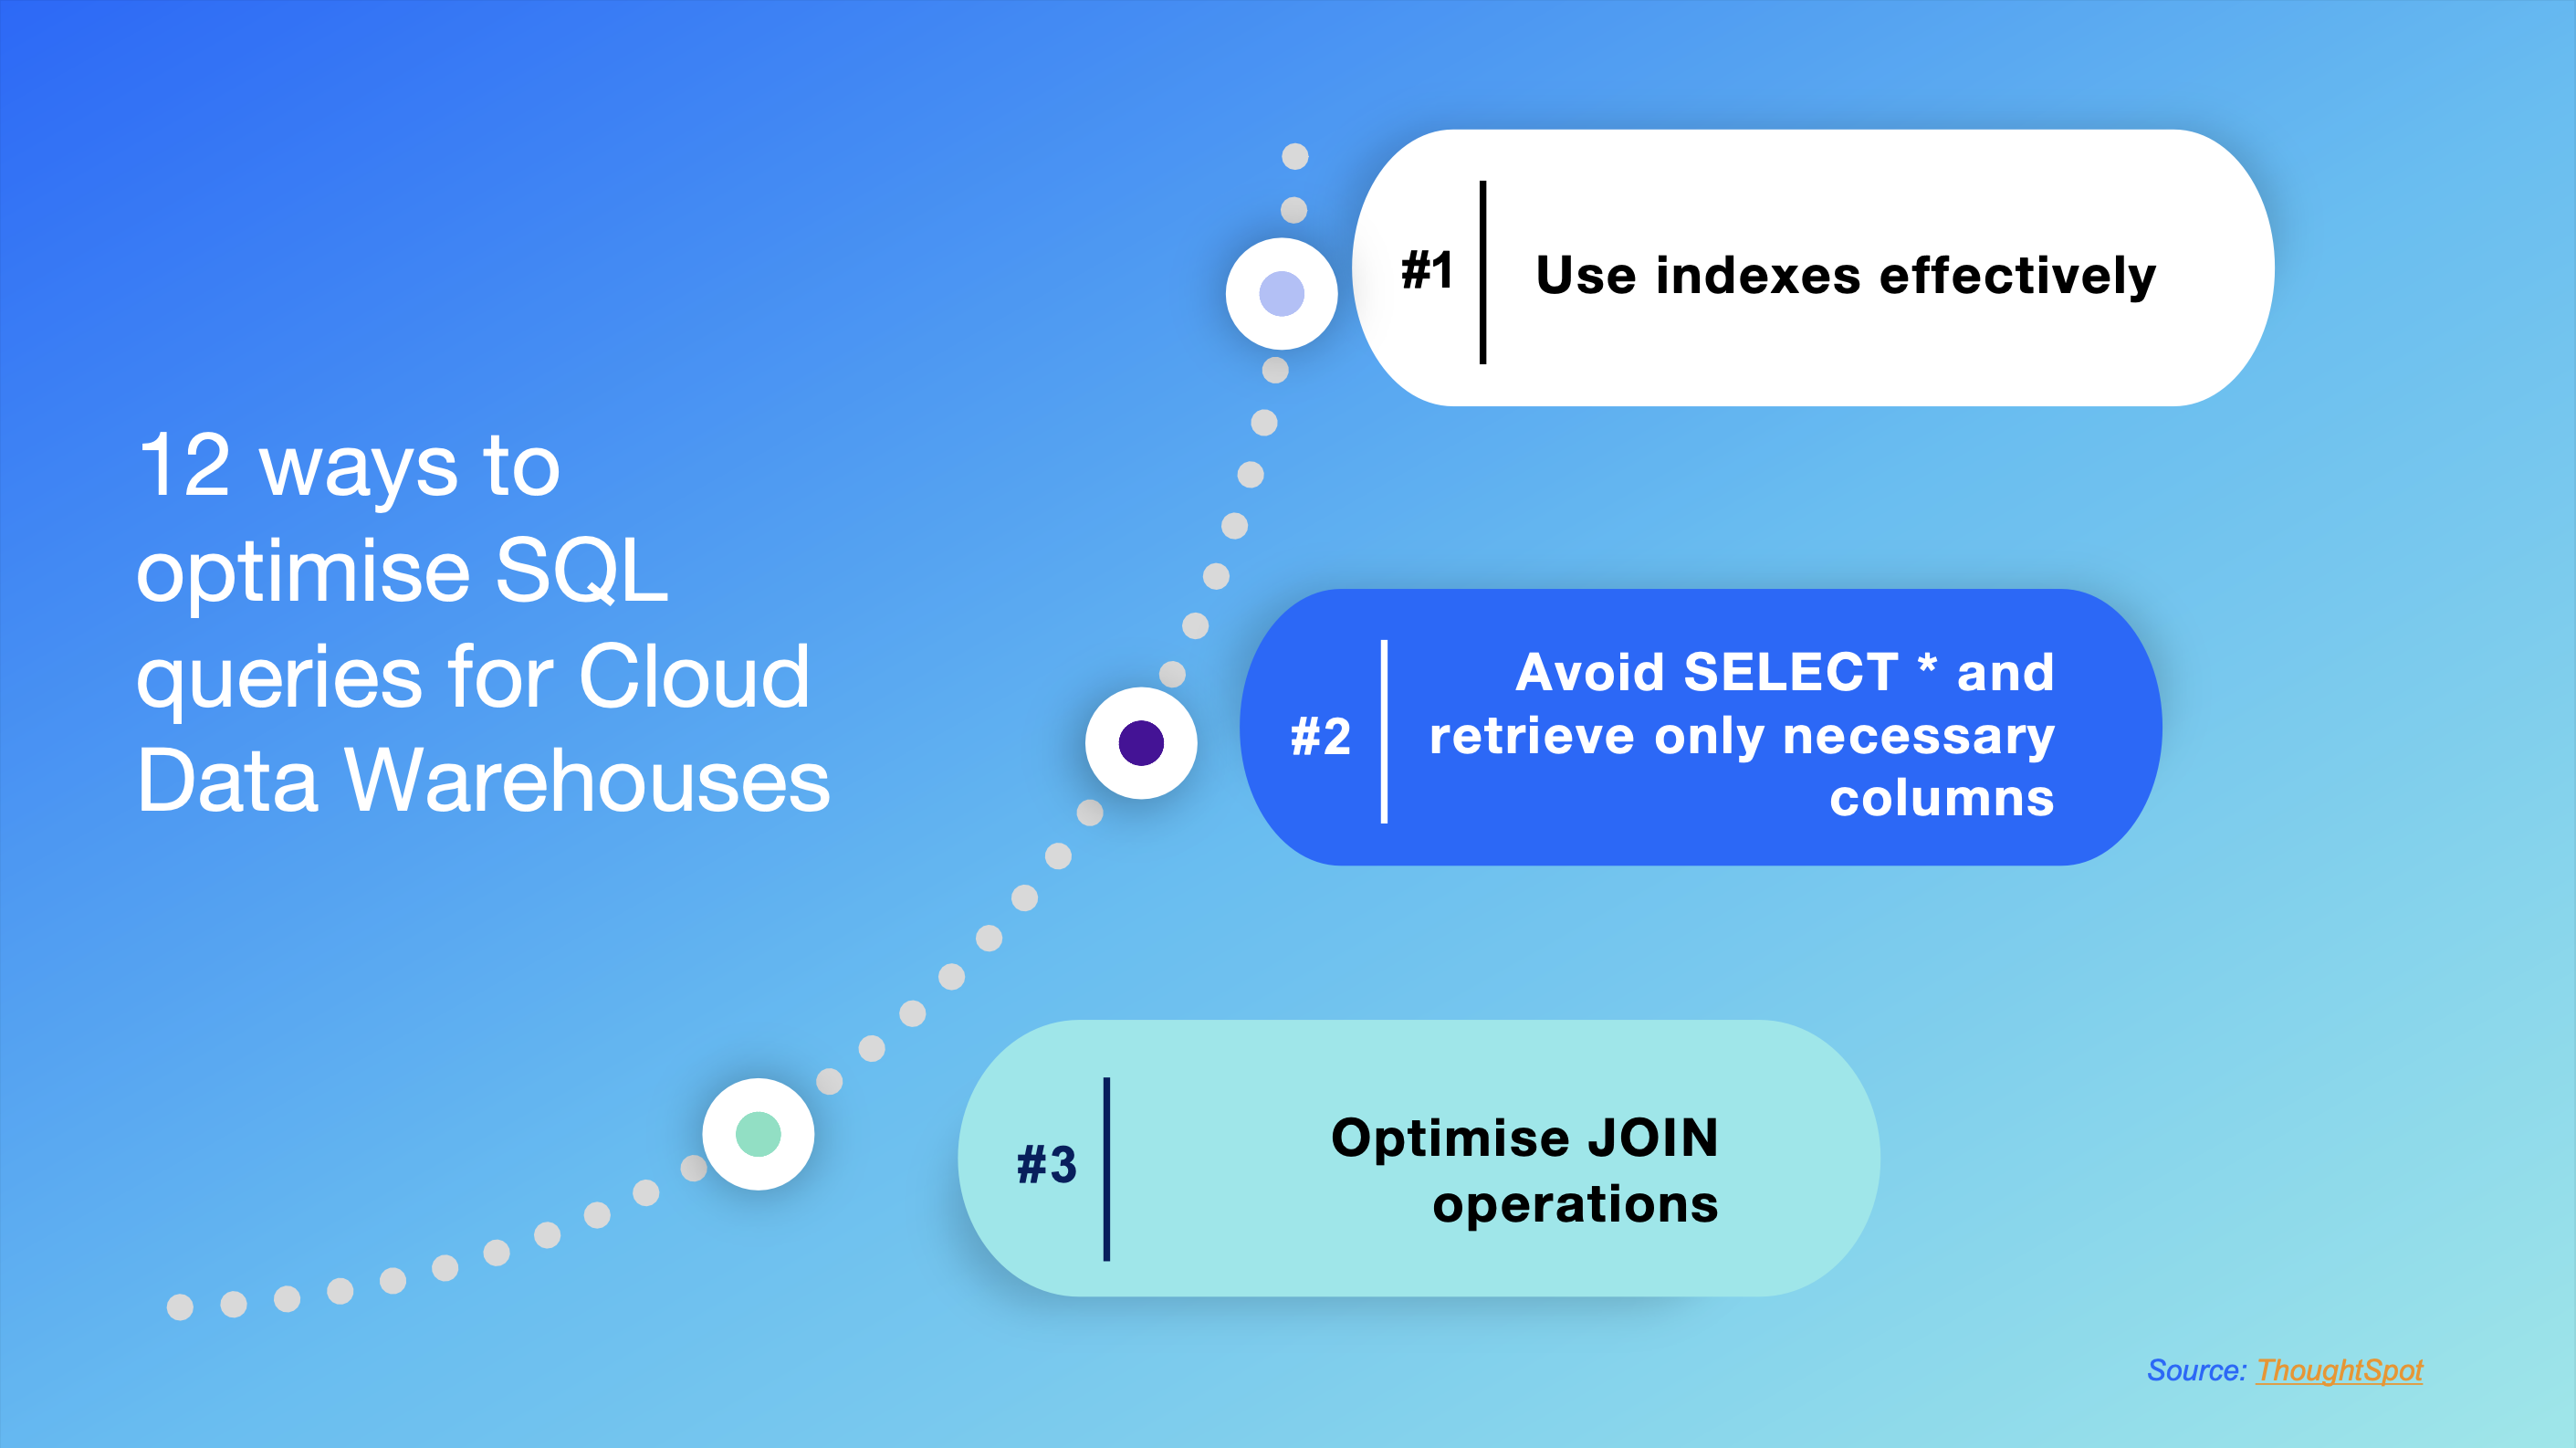

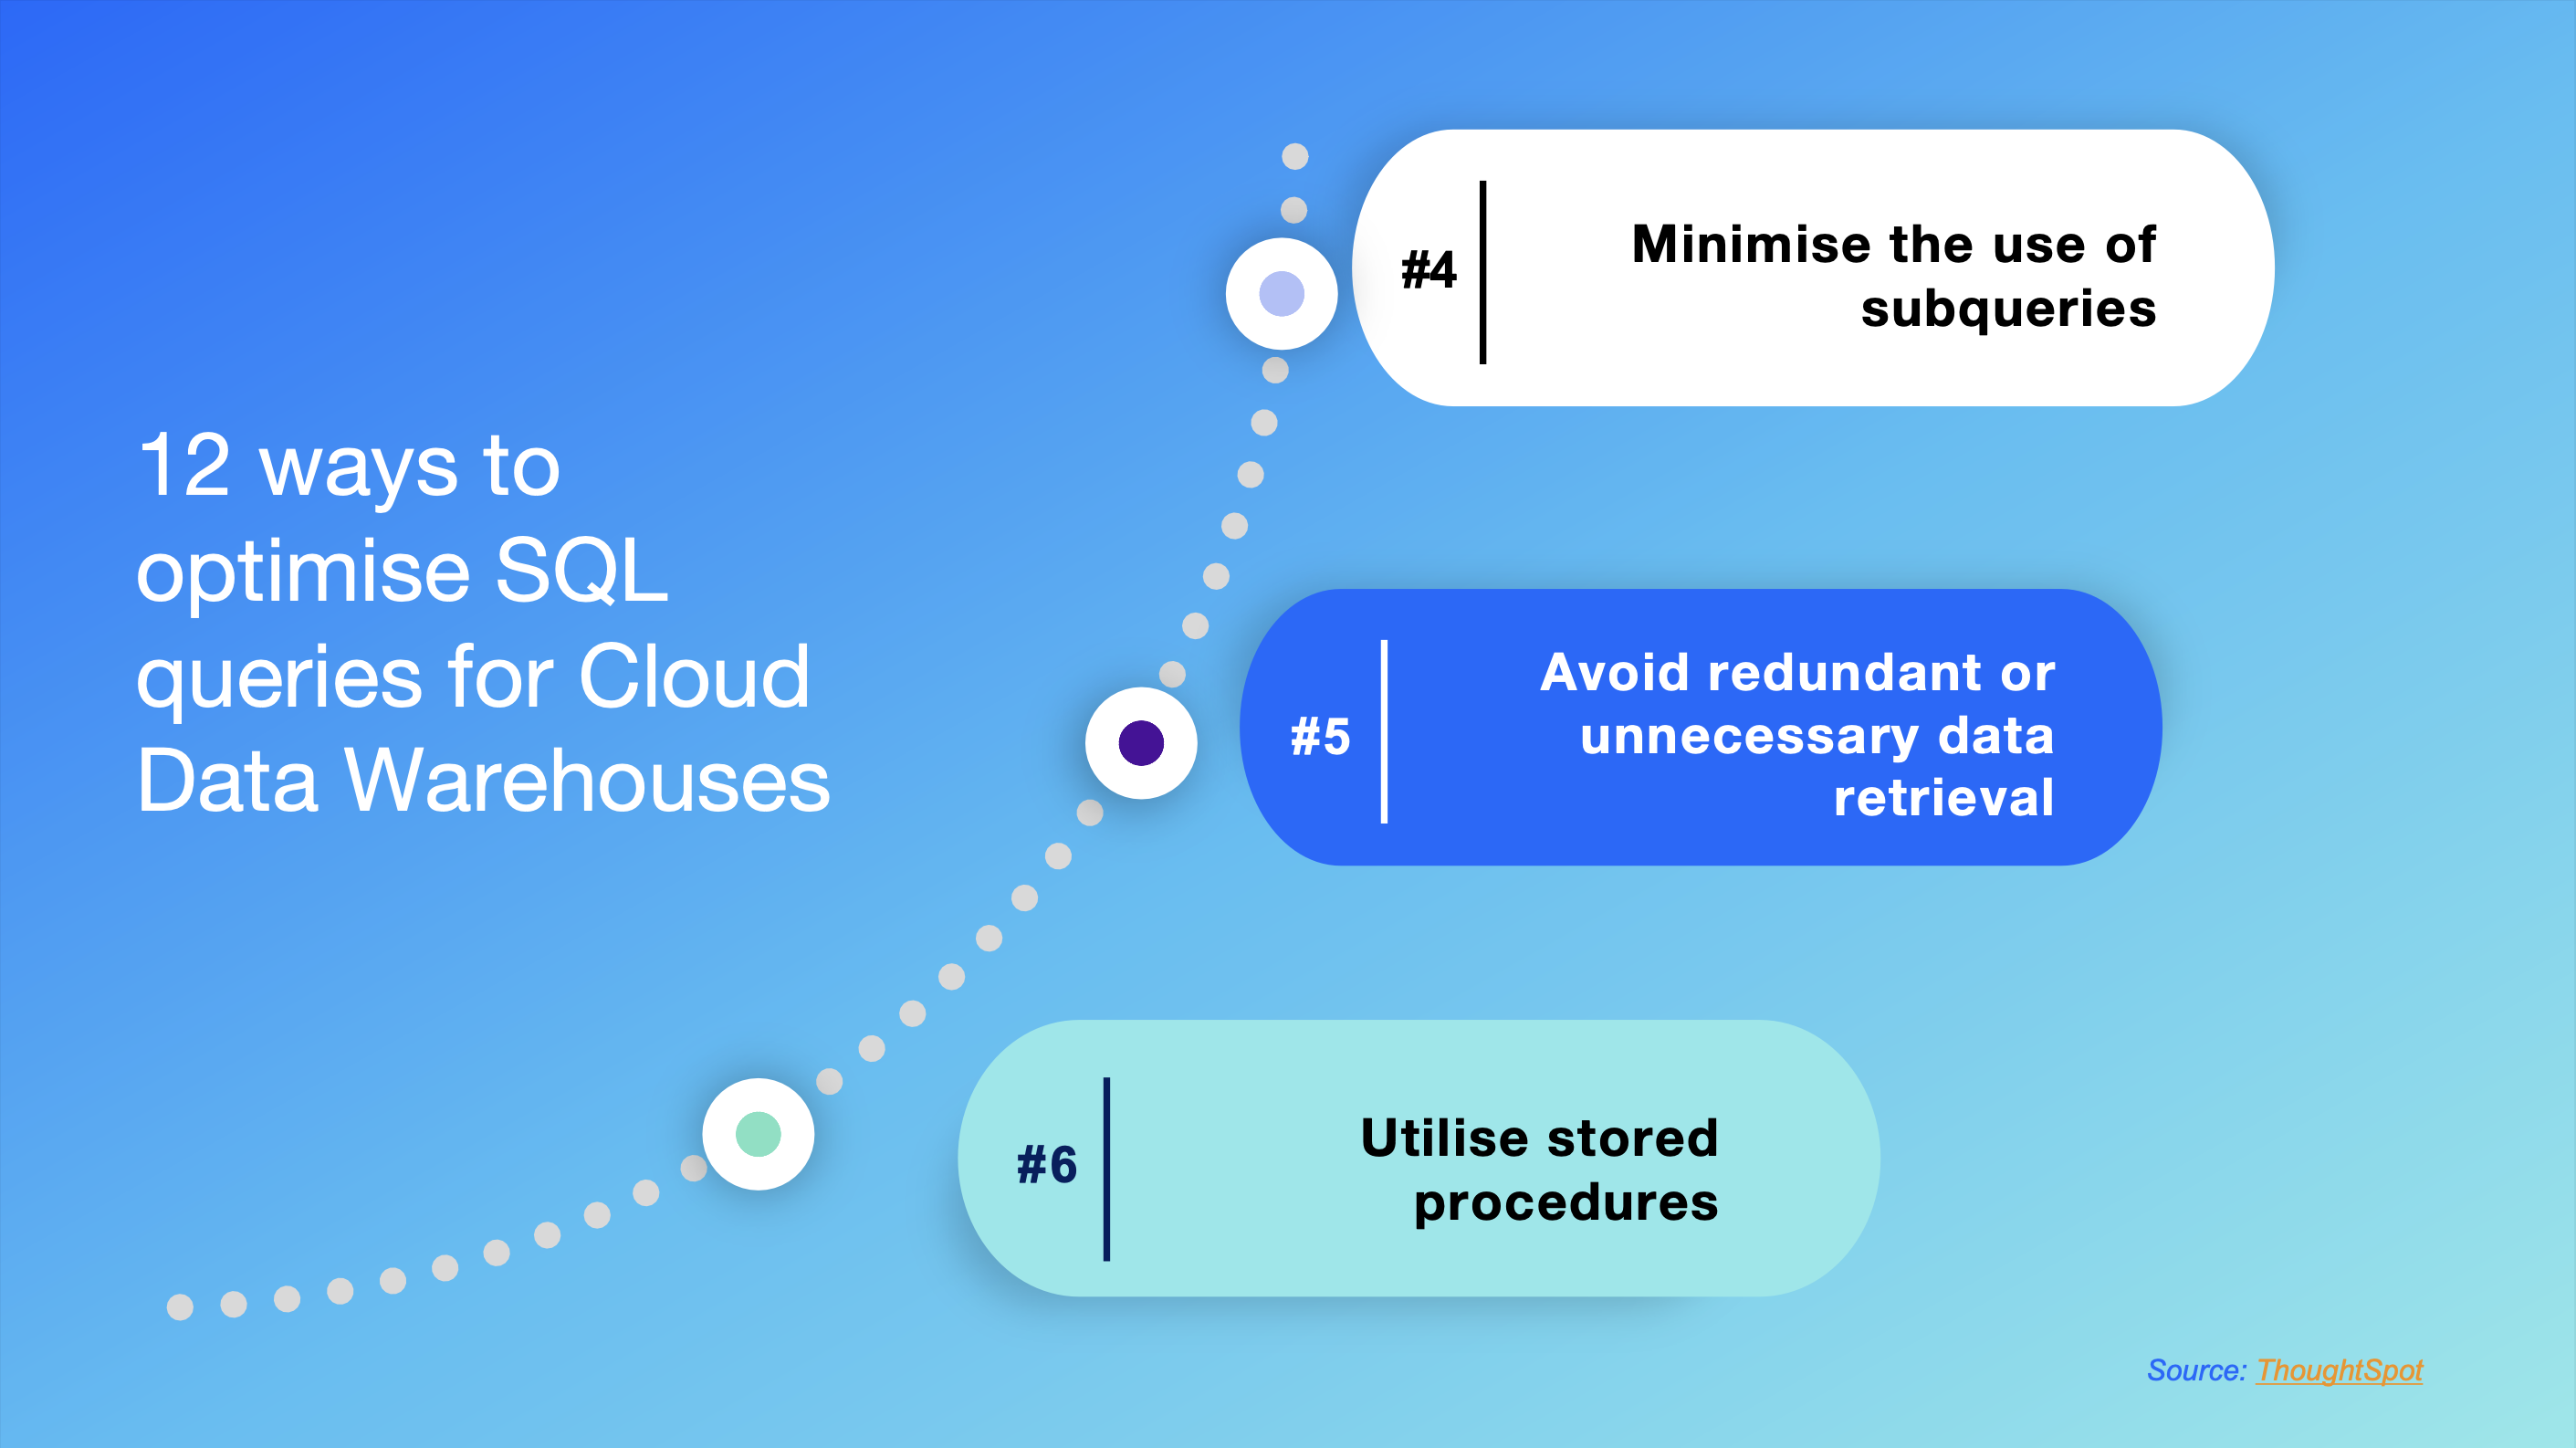

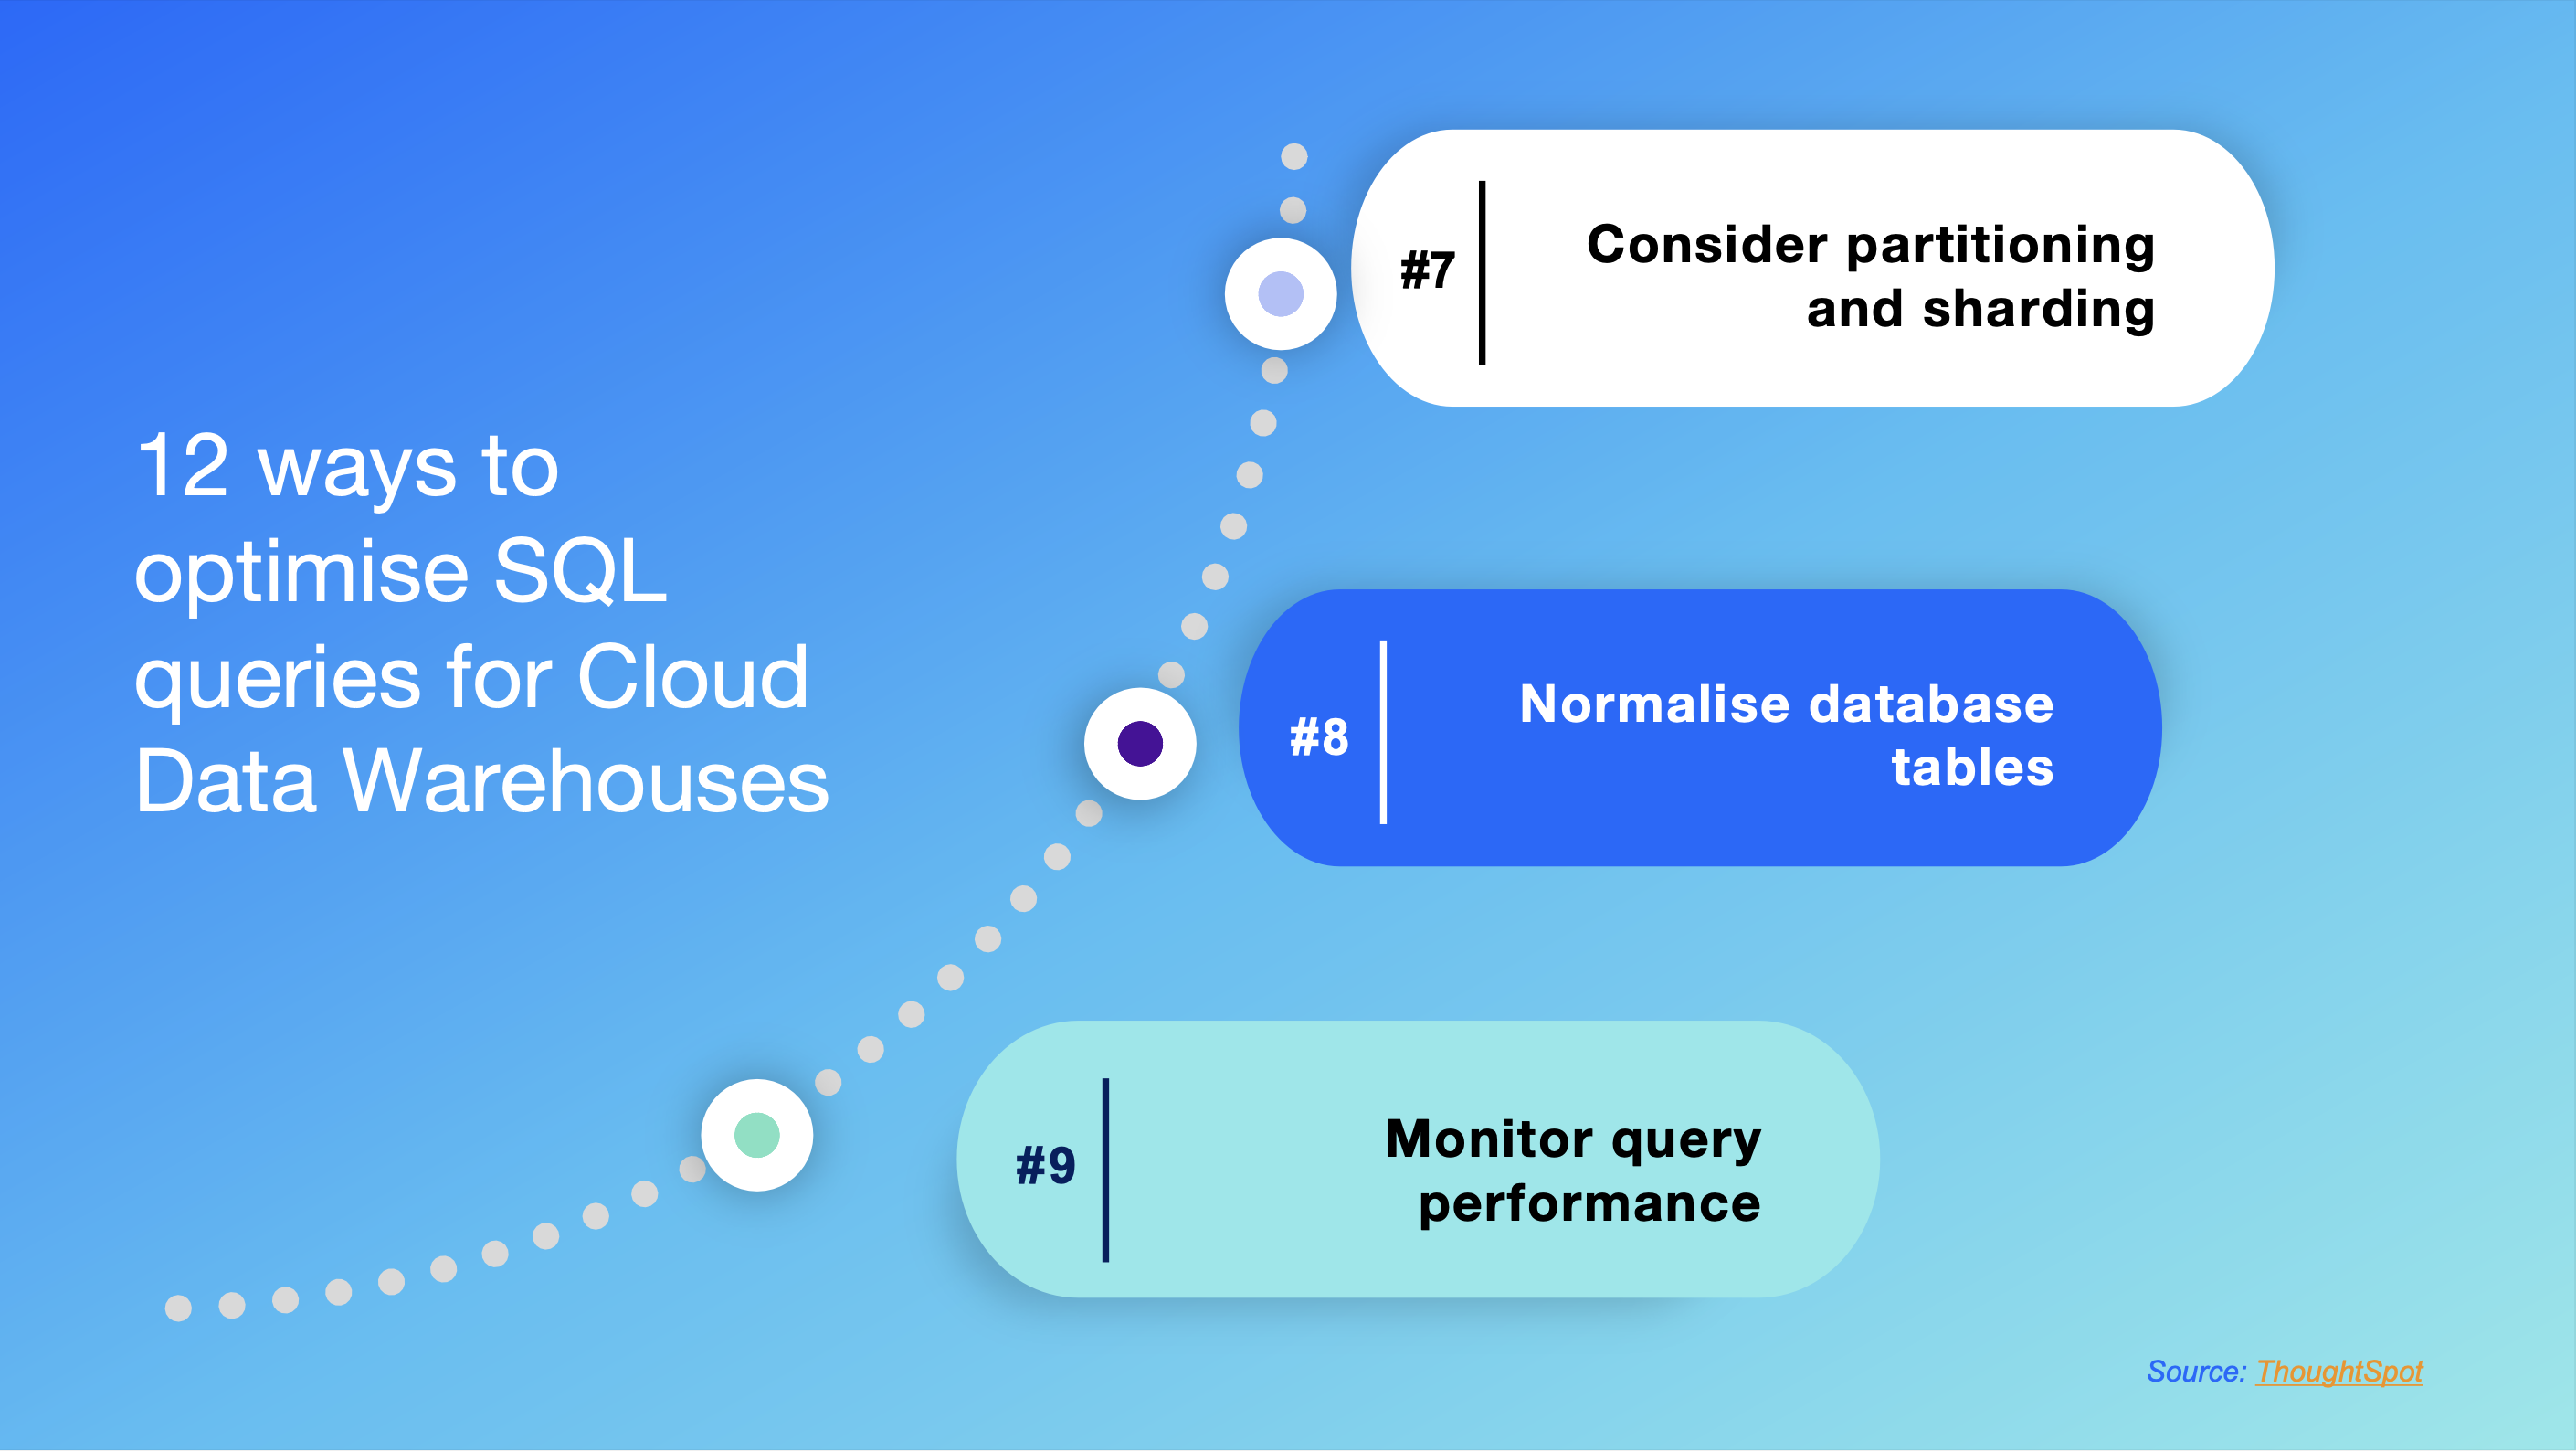

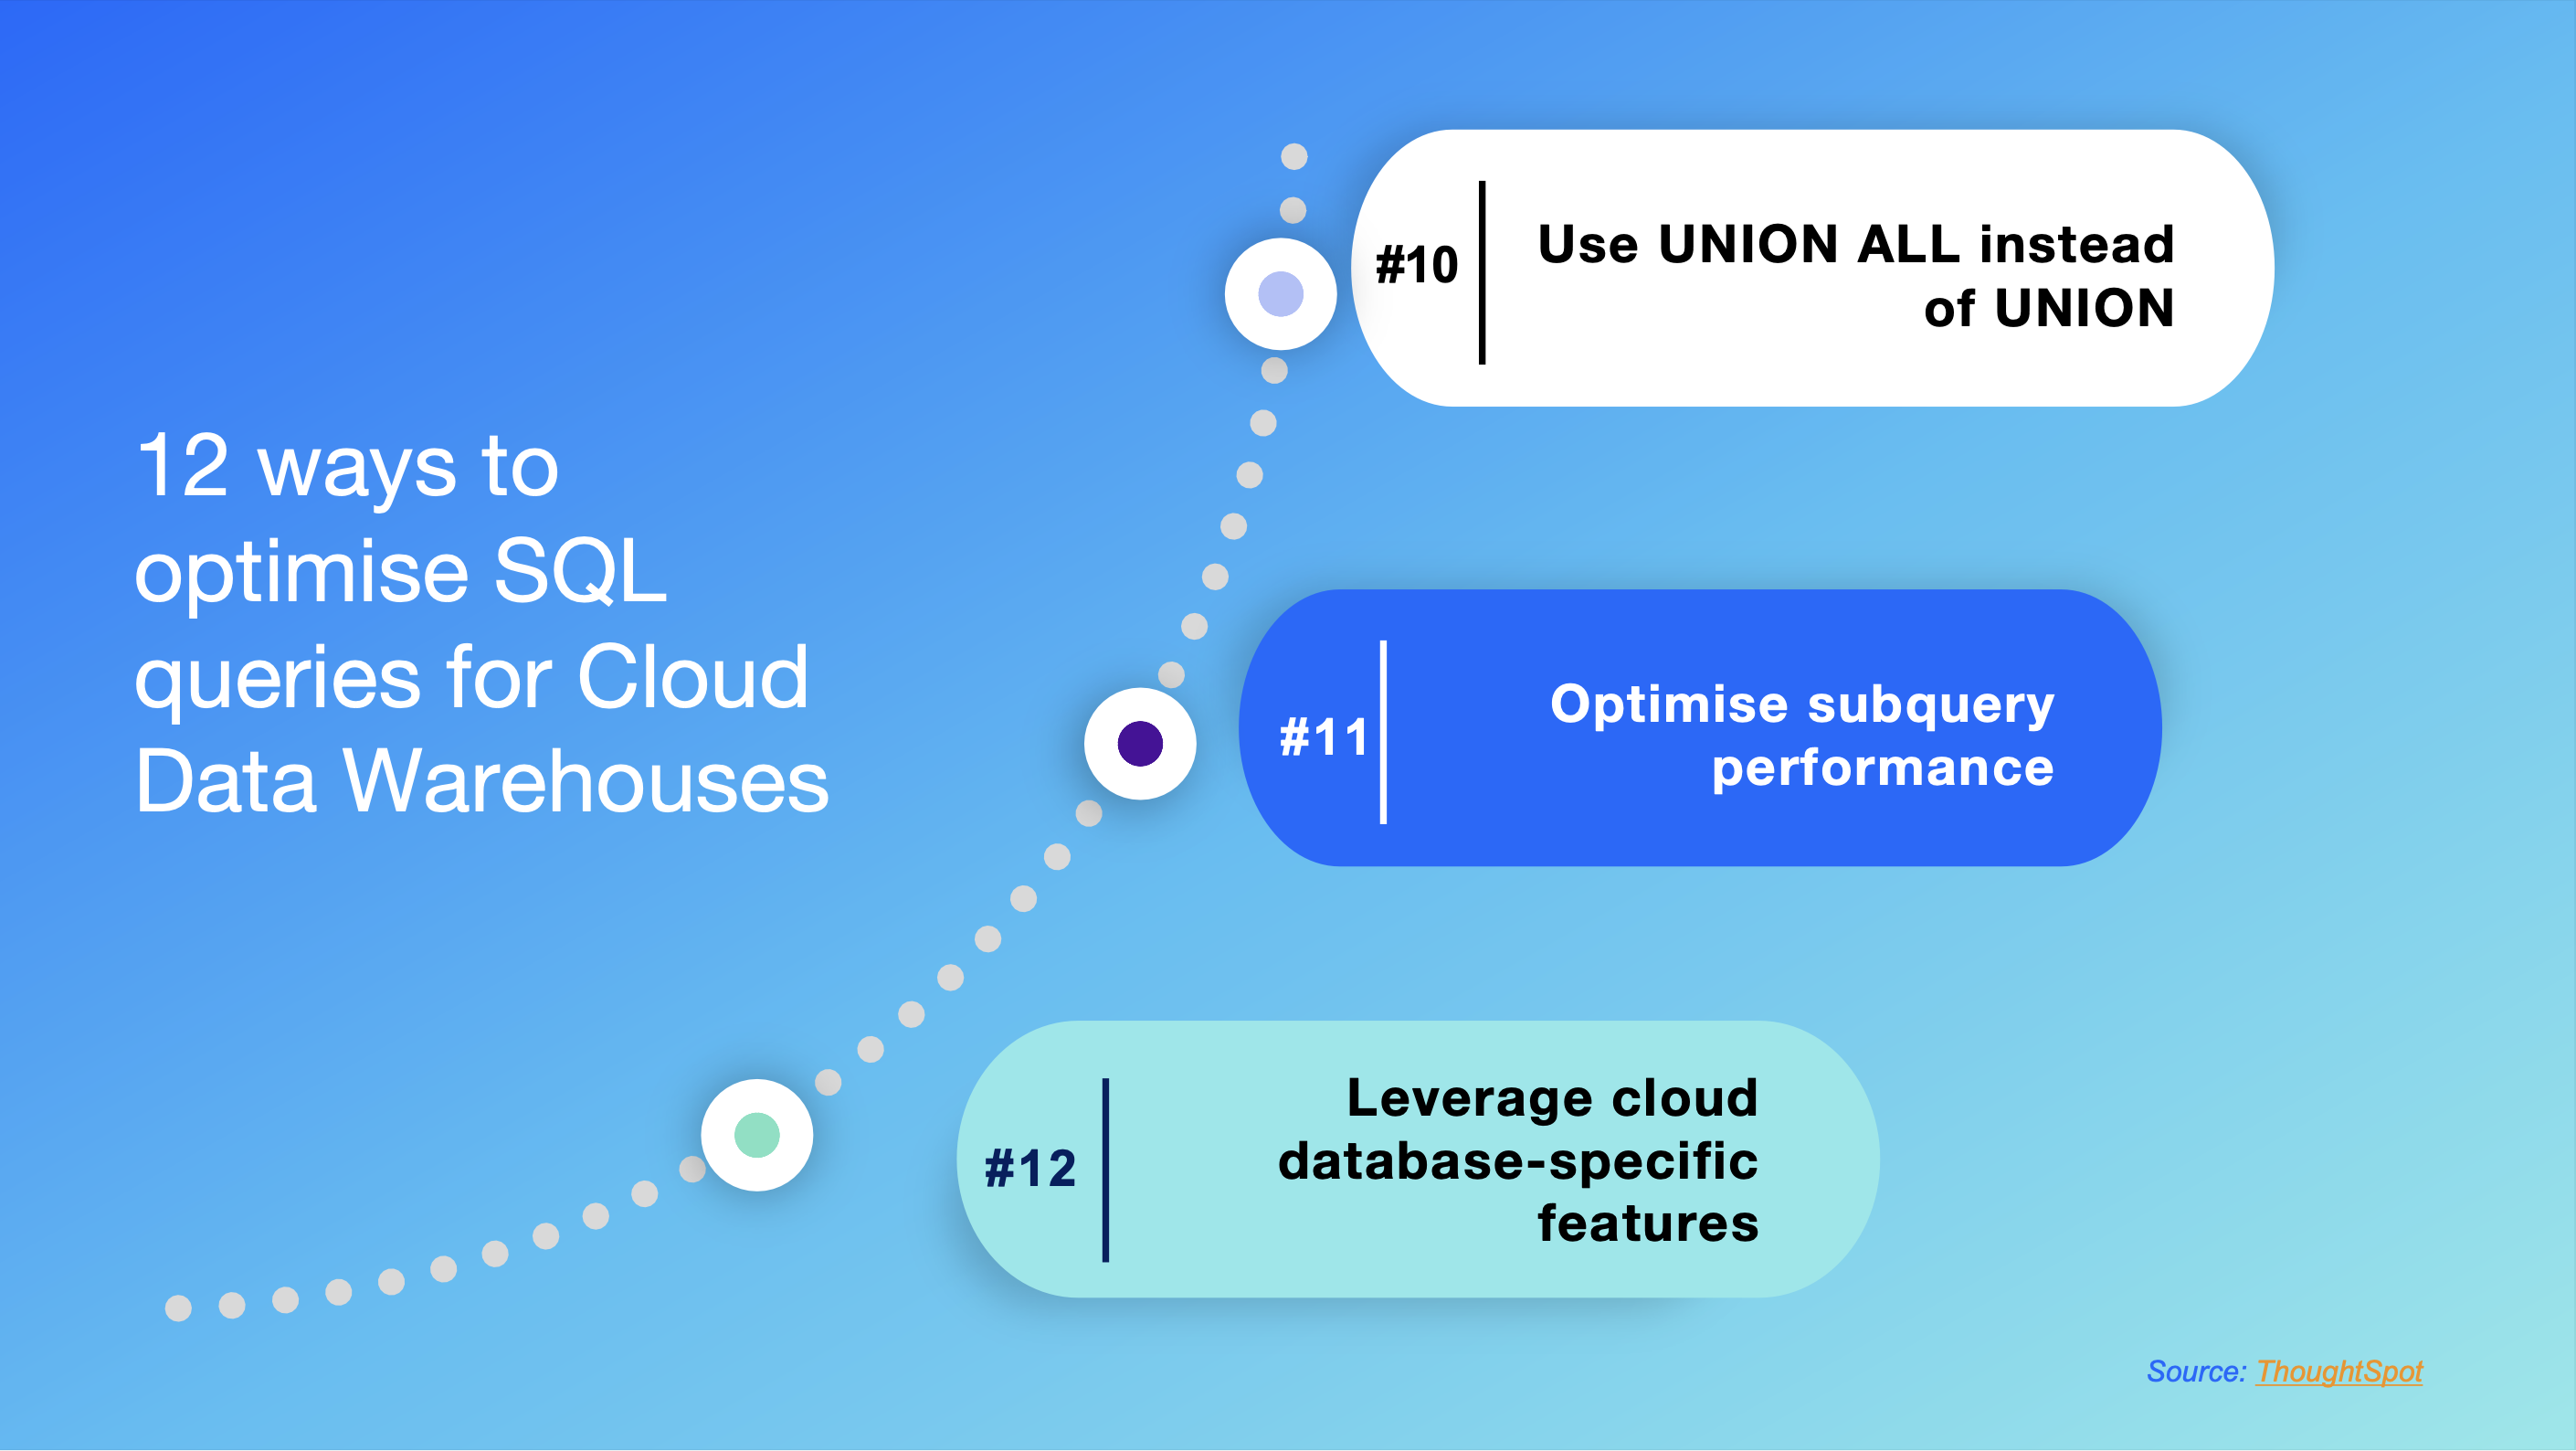

---

## 2. Loading SQL and TMDB database

In [12]:
load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [13]:
%%sql 

sqlite:///TMDB.db

<img src = "https://github.com/Explore-AI/Pictures/blob/master/TMDB_ER_diagram.png?raw=true" >

---

## 3. Tips on having efficient queries

<img src = "https://media3.giphy.com/media/xT5LMLA1lCOkYTUaf6/200.webp?cid=ecf05e47l5mgi68xu2msklvelvy3g6s6fmvj1z3vkozuczyv&ep=v1_gifs_search&rid=200.webp&ct=g" width=50%>

### Specific Columns instead of entire Table.

In [15]:
%%time 
%%sql
SELECT *
FROM movies;

 * sqlite:///TMDB.db
Done.
CPU times: user 18.8 ms, sys: 12.7 ms, total: 31.5 ms
Wall time: 42.1 ms


### Write a query that looks at the title and popularity of movies

In [16]:
%%time
%%sql

SELECT title, popularity
FROM movies;

 * sqlite:///TMDB.db
Done.
CPU times: user 8.39 ms, sys: 9.73 ms, total: 18.1 ms
Wall time: 18.6 ms


### JOINS vs WHERE Clauses

When working with multiple tables in a dataset. It is a good line of practice to use a `JOIN` statement as opposed to that of a `WHERE` clause in your query.

In [42]:
%%time
%%sql

SELECT title, popularity, characters
FROM movies, casts
WHERE movies.movie_id = casts.movie_id;

 * sqlite:///TMDB.db
Done.
CPU times: user 176 ms, sys: 7.49 ms, total: 184 ms
Wall time: 182 ms


As you would suspect when running using a `JOIN` steatement we find that the runtime is reduced when working with multiple tables.

In [41]:
%%time
%%sql
SELECT m.title, m.popularity, c.characters
FROM movies m
INNER JOIN casts c
ON m.movie_id = c.movie_id;

 * sqlite:///TMDB.db
Done.
CPU times: user 180 ms, sys: 48 ms, total: 228 ms
Wall time: 246 ms


### Wildcards

Wildcard queries in of themselves take up a significant amount of compute time. However you can modify a wildcard to be more efficient.

In [19]:
%%time
%%sql

SELECT actor_name, gender
FROM actors
WHERE gender LIKE '%2%';

 * sqlite:///TMDB.db
Done.
CPU times: user 59.5 ms, sys: 47.2 ms, total: 107 ms
Wall time: 116 ms


As you can see in this example when looking at gender. Whe tried to look for all types of signifiers for female. With that we assumed that all elements would start with the number **"2"** therefore we added the wildcard symbol `%` at the end of the string example

In [20]:
%%time
%%sql

SELECT actor_name, lower(gender)
FROM actors
WHERE gender LIKE '2%';

 * sqlite:///TMDB.db
Done.
CPU times: user 30.3 ms, sys: 2.57 ms, total: 32.8 ms
Wall time: 32.6 ms


---

## 4. Common Table Expressions

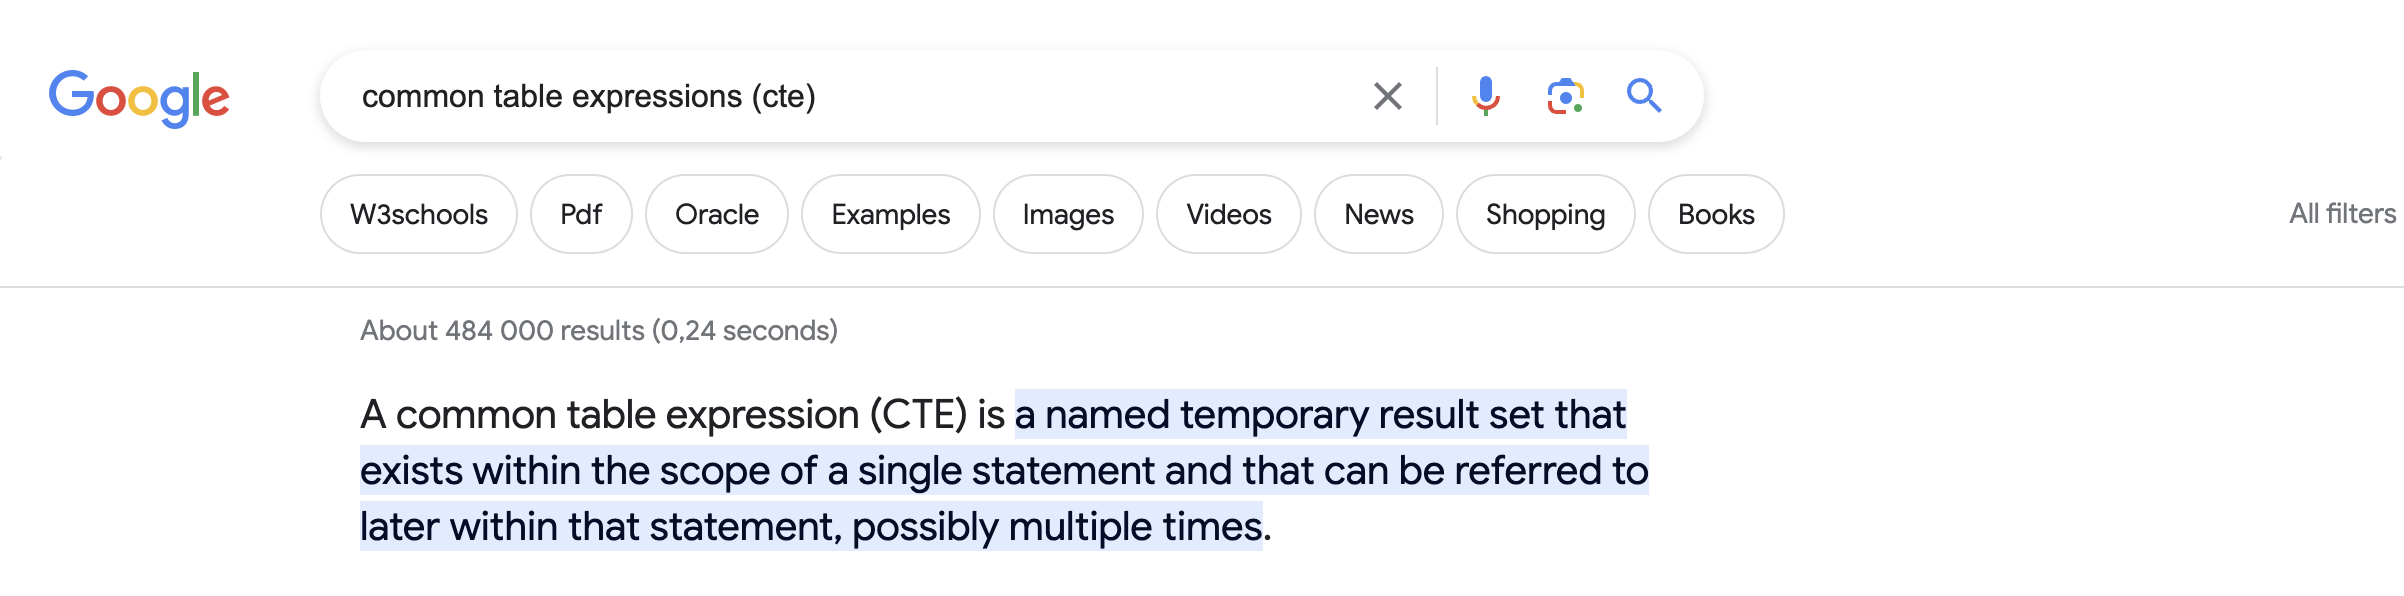

Syntax 1

```sql
WITH CTE AS
(
SELECT Column1, Column2
FROM table1
)
```

Syntax 2
```sql
SELECT Column1
FROM CTE
```

In [43]:
%%time
%%sql

SELECT title, budget
FROM movies
WHERE LOWER(title) like 'fast%';

 * sqlite:///TMDB.db
Done.
CPU times: user 4.73 ms, sys: 7.31 ms, total: 12 ms
Wall time: 10.9 ms


In [45]:
%%time
%%sql

WITH CTE AS
(SELECT LOWER(title) title_lower FROM movies)

SELECT title_lower
FROM CTE
WHERE title_lower like 'fast%';

 * sqlite:///TMDB.db
Done.
CPU times: user 6.83 ms, sys: 5.1 ms, total: 11.9 ms
Wall time: 10.3 ms


## Calculations using CTEs

<img src = "https://media1.giphy.com/media/K4kSJ51JJeC7cHAQ1a/200w.webp?cid=ecf05e47z0yaaba8k6epaiwaaqcdrt7lombip9p2tr1xj1xo&ep=v1_gifs_search&rid=200w.webp&ct=g" width=40%>

When working on calculations one can use CTEs. This helps with improving the efficiency of a query one may make when calling for specific data in a dataset.

In [34]:
%%time
%%sql
SELECT AVG(budget)
FROM movies;

 * sqlite:///TMDB.db
Done.
CPU times: user 3.52 ms, sys: 8.61 ms, total: 12.1 ms
Wall time: 10.7 ms


Can you pick up why the below example is less efficient then the previous query?

In [47]:
%%time
%%sql
-- Something interesting happens here, ability improve?
WITH CTE AS
(SELECT AVG(budget) AS Overall FROM movies) 
SELECT * 
FROM CTE;

 * sqlite:///TMDB.db
Done.
CPU times: user 2.7 ms, sys: 4.58 ms, total: 7.28 ms
Wall time: 6.84 ms


# Examples

In the following example the goal will be to take the existing querries and try optimise these queries. Doing so with the goal of getting the same outcome at the end.

## Question1

Note that in this example you have multiple options to optimise the code, try to find them all!

In [37]:
%%time
%%sql
--Optimise the following looking at budget and title characters
SELECT *
FROM movies, casts
WHERE movies.movie_id = casts.movie_id;

 * sqlite:///TMDB.db
Done.
CPU times: user 385 ms, sys: 61.3 ms, total: 446 ms
Wall time: 476 ms


In [38]:
%%time
%%sql

 * sqlite:///TMDB.db
Done.
CPU times: user 182 ms, sys: 14.3 ms, total: 196 ms
Wall time: 223 ms


## Question 2

This example has a calculation that looks at the runtime of each movie against the overall runtime. How would you optimise the *runtime* of your querry

In [ ]:
%%time
%%sql
-- Optimise the following
SELECT AVG(runtime) AS Avarage_Runtimew
FROM movies, genremap, genres
WHERE movies.movie_id = genremap.movie_id
AND genremap.genre_id = genres.genre_id;

In [ ]:
%%time
%%sql